In [1]:
import pandas as pd

In [6]:
file_path0 = "/content/drive/MyDrive/train_data.txt"
file_path1 = "/content/drive/MyDrive/test_data.txt"
file_path2 = "/content/drive/MyDrive/test_data_solution.txt"

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from sklearn.feature_extraction.text import CountVectorizer


Step 1 : Load and Parse Training data.

In [9]:
with open(file_path0, "r", encoding="utf-8") as file:
    train_lines = file.readlines()

Parse the training data

In [10]:
train_data = []
for line in train_lines:
    parts = line.strip().split(" ::: ")
    train_data.append({
        "ID" : parts[0],
        "TITLE" : parts[1],
        "GENRE" : parts[2],
        "DESCRIPTION" : parts[3],
    })

Convert to DataFrame

In [11]:
train_df = pd.DataFrame(train_data)

Step 2: Visualize the Genre Distribution

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-28-c296a1463799>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="GENRE", data=train_df, palette="viridis", order=train_df["GENRE"].value_counts().index)


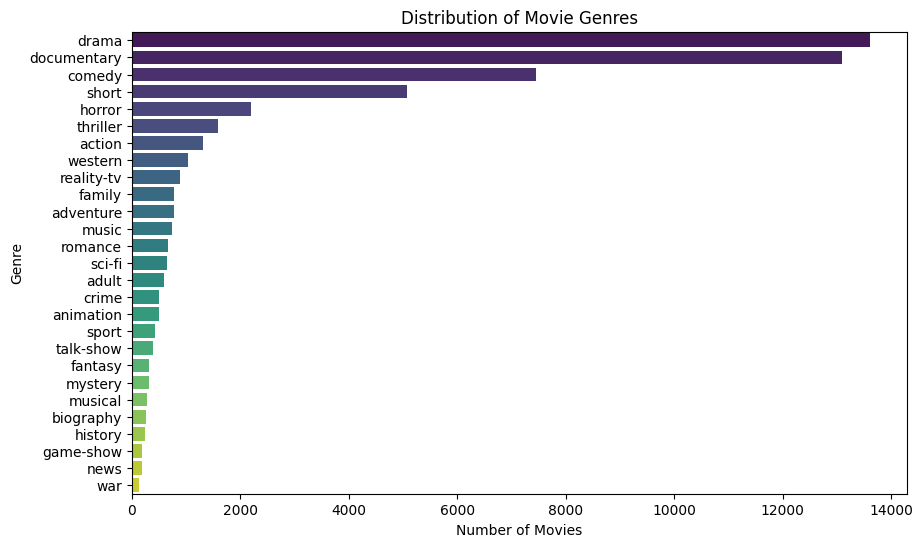

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y="GENRE", data=train_df, palette="viridis", order=train_df["GENRE"].value_counts().index)
plt.title("Distribution of Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

Features and target for training

In [12]:
X_train = train_df["DESCRIPTION"]
Y_train = train_df["GENRE"]

Step 3 : Load and parse testing data

In [13]:
with open(file_path1, "r", encoding="utf-8") as file:
    test_lines = file.readlines()

Parse testing data

In [14]:
test_data = []
for line in test_lines:
    parts = line.strip().split(" ::: ")
    test_data.append({
        "ID" : parts[0],
        "TITLE" : parts[1],
        "DESCRIPTION" : parts[2],
    })

Convert to DataFrame

In [15]:
test_df = pd.DataFrame(test_data)

In [16]:
X_test = test_df["DESCRIPTION"]

Step 4 : Vectorize the text data

In [17]:
vectorizer = CountVectorizer()

In [18]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Step 5 : Train the model

In [20]:
lr = LogisticRegression()
lr.fit(X_train_vectorized, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Step 6 : Make Predictions on testing data

In [21]:
y_pred = lr.predict(X_test_vectorized)
print(y_pred)

['comedy' 'drama' 'documentary' ... 'comedy' 'drama' 'documentary']


Step 7 : Load and use the test solution for data evaluation

In [22]:
with open(file_path2, "r", encoding="utf-8") as file:
    test_sol_lines = file.readlines()

Parse the test solution data

In [23]:
test_sol_data = []
for line in test_sol_lines:
    parts = line.strip().split(" ::: ")
    test_sol_data.append(parts[2])

Convert to Series

In [24]:
Y_test = pd.Series(test_sol_data)

Step 8 : Evaluate the model

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
print("Accuracy :",accuracy_score(Y_test, y_pred))

Accuracy : 0.5809040590405904


Visuals of Confusion Matrix

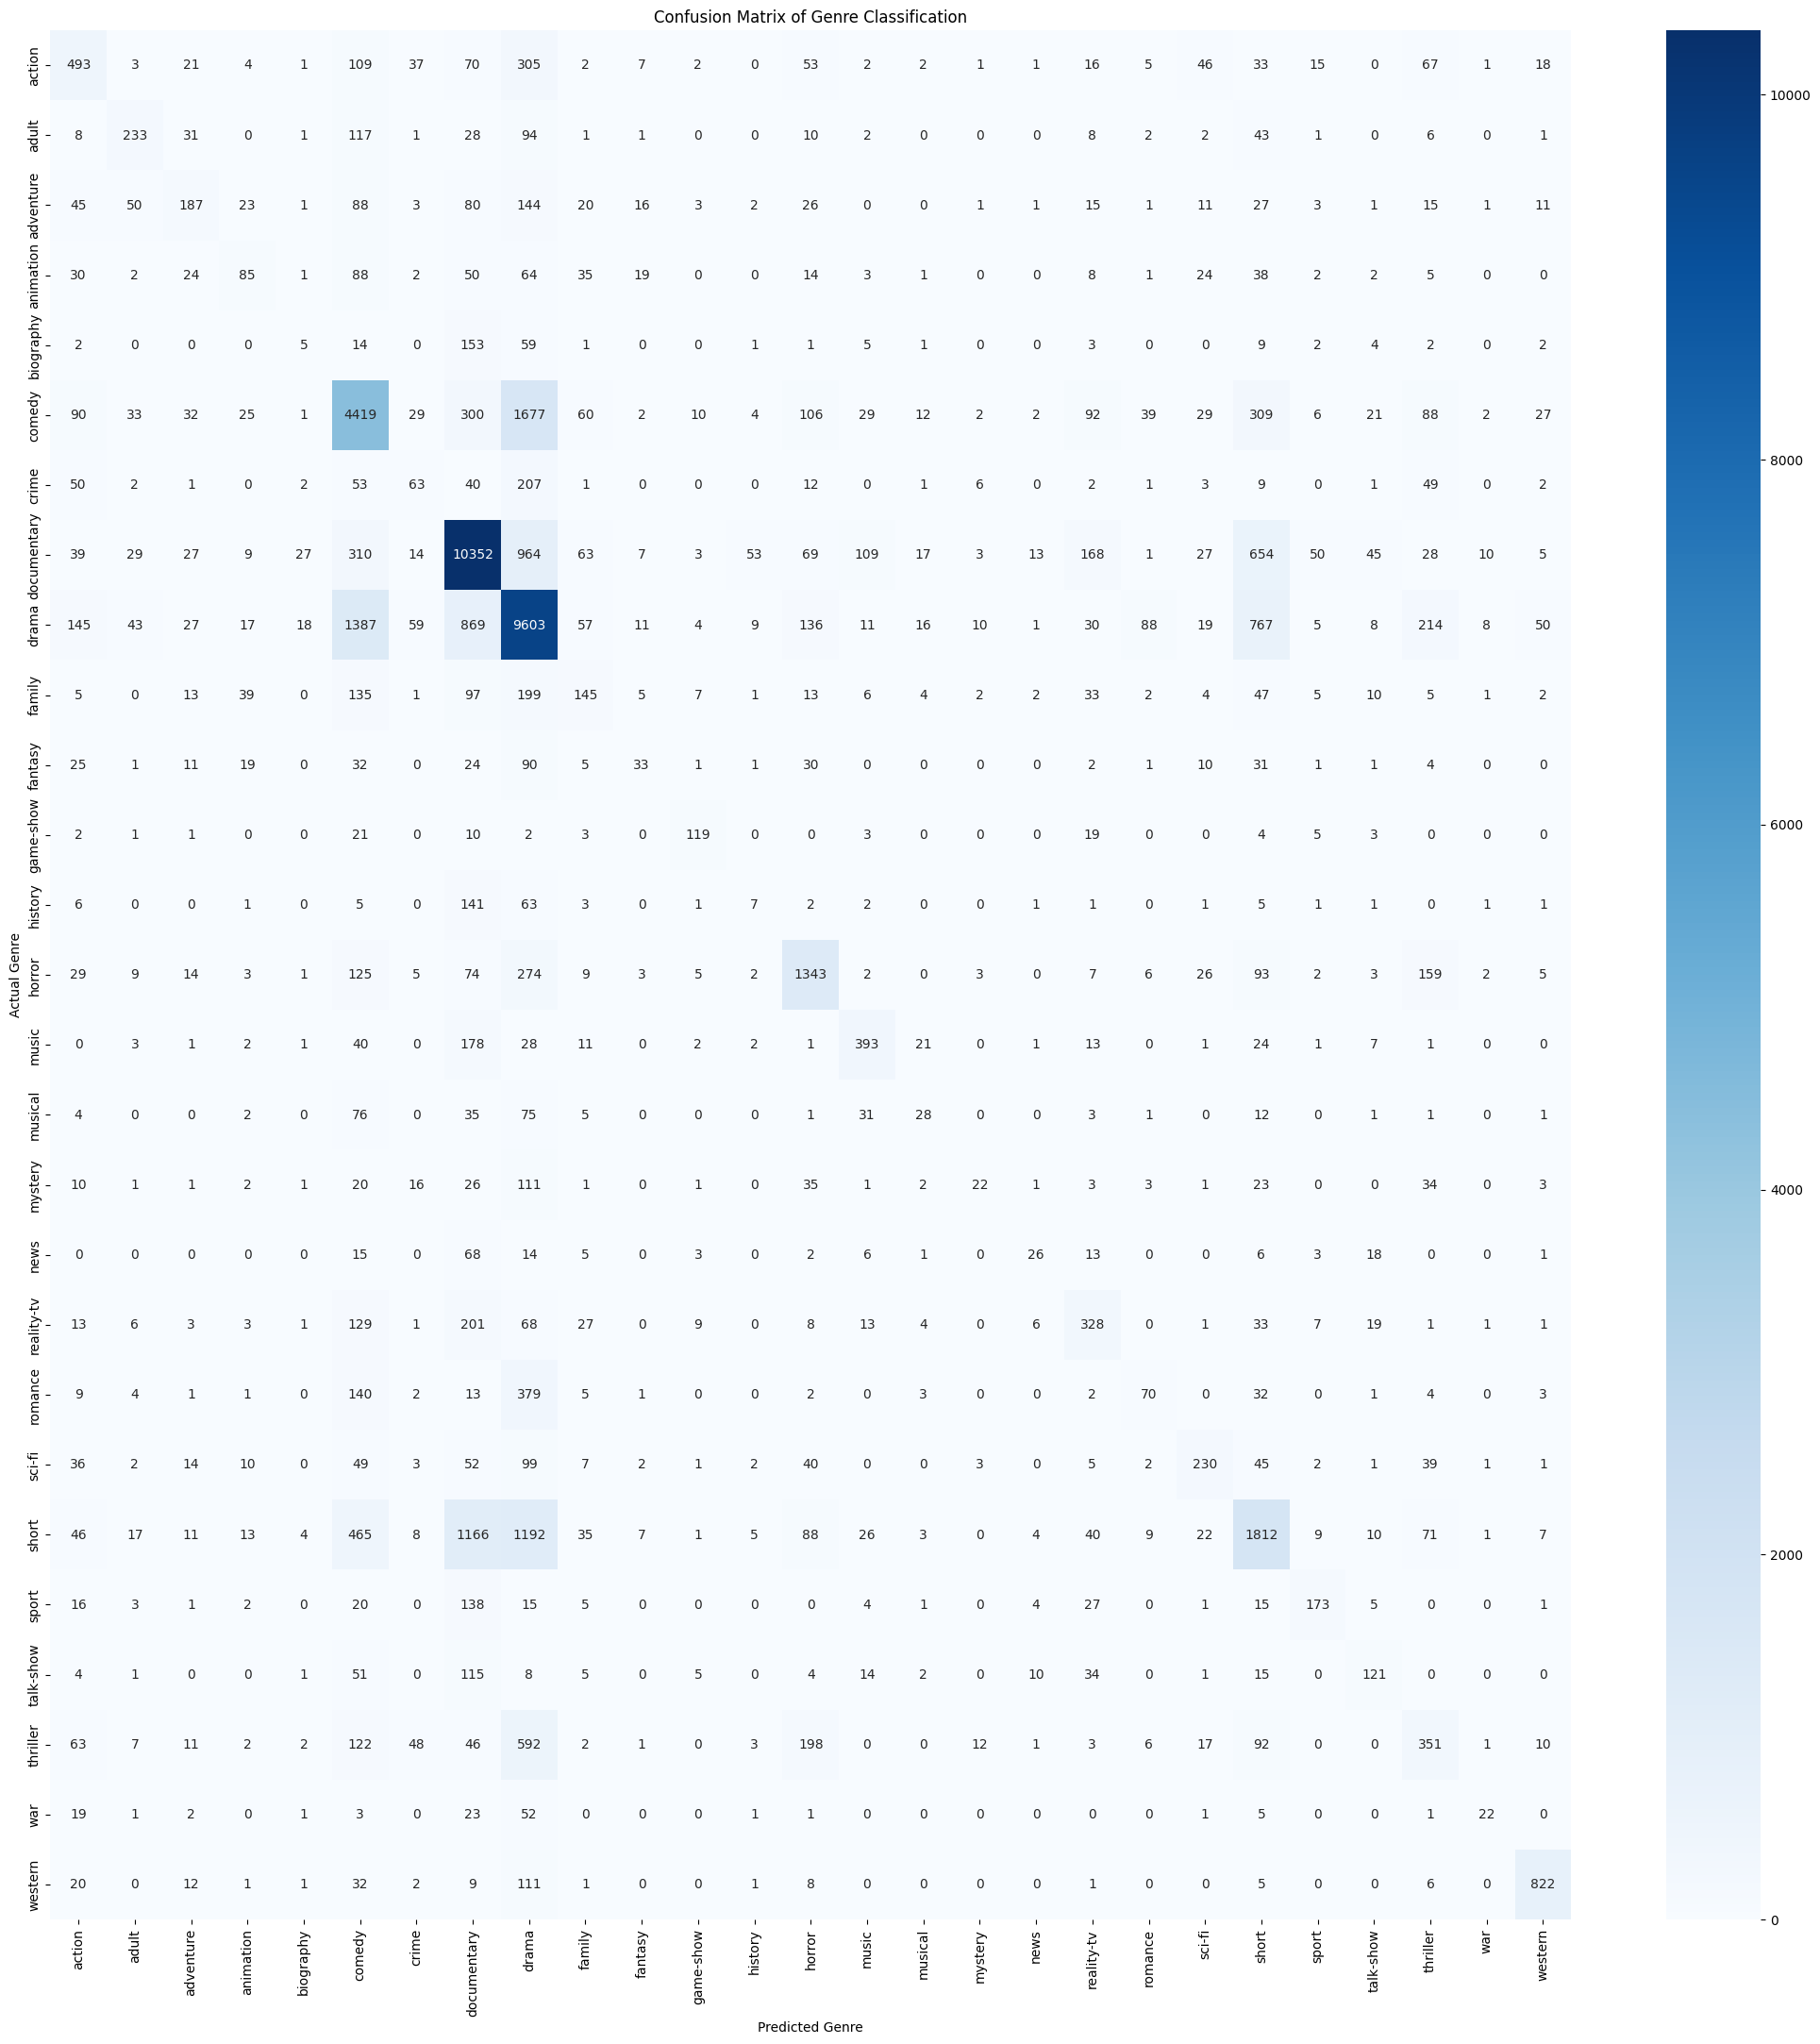


Sample Predictions:

                                TITLE  \
54195  "Tales of Light & Dark" (2013)   
54196     Der letzte Mohikaner (1965)   
54197             Oliver Twink (2007)   
54198               Slipstream (1973)   
54199       Curitiba Zero Grau (2010)   

                                             DESCRIPTION PREDICTED_GENRE  \
54195  Covering multiple genres, Tales of Light & Dar...          horror   
54196  As Alice and Cora Munro attempt to find their ...       adventure   
54197  A movie 169 years in the making. Oliver Twist,...          comedy   
54198  Popular, but mysterious rock D.J Mike Mallard ...           drama   
54199  Curitiba is a city in movement, with rhythms a...     documentary   

      ACTUAL_GENRE  
54195       horror  
54196      western  
54197        adult  
54198        drama  
54199        drama  


In [33]:
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(26, 26))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(Y_test.unique()), yticklabels=sorted(Y_test.unique()))
plt.title("Confusion Matrix of Genre Classification")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.show()

# Display the First Few Predictions Alongside Actual Labels
results_df = pd.DataFrame({
    "TITLE": test_df["TITLE"], "DESCRIPTION": test_df["DESCRIPTION"], "PREDICTED_GENRE": y_pred, "ACTUAL_GENRE": Y_test
})
print("\nSample Predictions:\n")
print(results_df.tail())